In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import scipy.stats as st
import math
from numpy import nan

In [2]:
df = pd.read_csv("Train.csv", low_memory=False)

In [3]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
total_rows=len(df.axes[0]) 
total_cols=len(df.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

sz = Path('Train.csv').stat().st_size
gb_sz = sz/1000000000
print("The file is", sz, "bytes or", gb_sz, "gigabytes")

Number of Rows: 13647309
Number of Columns: 48
The file is 2292759599 bytes or 2.292759599 gigabytes


In [5]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [6]:
df.rename(columns={'fecha_dato':'Partitioned Date',
                    'ncodpers':'Customer Code',
                    'ind_empleado':'Employee Index',
                    'pais_residencia':'Country Residence',
                    'sexo':'Sex',
                    'age':'Age',
                    'fecha_alta':'Date Joined',
                    'ind_nuevo':'New Customer Index',
                    'antiguedad':'Seniority',
                    'indrel':'Primary Customer',
                    'ult_fec_cli_1t':'Last Date as Primary Customer',
                    'indrel_1mes':'Customer Type at Beginning of Month',
                    'tiprel_1mes':'Customer Relation Type at Beginning of Month',
                    'indresi':'Resident Country is Bank Country',
                    'indext':'Birth Country Different Than Bank Country',
                    'conyuemp':'Spouse Index', 
                    'canal_entrada':'Channel Used to Join', 
                    'indfall':'Deceased', 
                    'tipodom':'Address Type', 
                    'cod_prov':'Province Code',
                    'nomprov':'Province Name', 
                    'ind_actividad_cliente':'Activity Index', 
                    'renta':'Gross Household Income', 
                    'segmento':'Segmentation',
                    'ind_ahor_fin_ult1':'Savings Account',
                    'ind_aval_fin_ult1':'Guarantees', 
                    'ind_cco_fin_ult1':'Current Accounts',
                    'ind_cder_fin_ult1':'Derivative Account', 
                    'ind_cno_fin_ult1':'Payroll Account', 
                    'ind_ctju_fin_ult1':'Junior Account',
                    'ind_ctma_fin_ult1':'More Partiuclar Account', 
                    'ind_ctop_fin_ult1':'Particular Account', 
                    'ind_ctpp_fin_ult1':'Particular Plus Account',
                    'ind_deco_fin_ult1':'Short-Term Deposits',
                    'ind_deme_fin_ult1':'Medium-Term Deposits', 
                    'ind_dela_fin_ult1':'Long-Term Deposits',
                    'ind_ecue_fin_ult1':'E-Account',
                    'ind_fond_fin_ult1':'Funds', 
                    'ind_hip_fin_ult1':'Mortgage',
                    'ind_plan_fin_ult1':'Pensions', 
                    'ind_pres_fin_ult1':'Loans', 
                    'ind_reca_fin_ult1':'Taxes',
                    'ind_tjcr_fin_ult1':'Credit Card', 
                    'ind_valo_fin_ult1':'Securities', 
                    'ind_viv_fin_ult1':'Home Account',
                    'ind_nomina_ult1':'Payroll', 
                    'ind_nom_pens_ult1':'Pension', 
                    'ind_recibo_ult1':'Direct Debit'}, inplace = True)

In [7]:
df

,Partitioned Date,Customer Code,Employee Index,Country Residence,Sex,Age,Date Joined,New Customer Index,Seniority,Primary Customer,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
df.dtypes

Partitioned Date                                 object
Customer Code                                     int64
Employee Index                                   object
Country Residence                                object
Sex                                              object
Age                                              object
Date Joined                                      object
New Customer Index                              float64
Seniority                                        object
Primary Customer                                float64
Last Date as Primary Customer                    object
Customer Type at Beginning of Month              object
Customer Relation Type at Beginning of Month     object
Resident Country is Bank Country                 object
Birth Country Different Than Bank Country        object
Spouse Index                                     object
Channel Used to Join                             object
Deceased                                        

In [9]:
 df.isna().sum()

Partitioned Date                                       0
Customer Code                                          0
Employee Index                                     27734
Country Residence                                  27734
Sex                                                27804
Age                                                    0
Date Joined                                        27734
New Customer Index                                 27734
Seniority                                              0
Primary Customer                                   27734
Last Date as Primary Customer                   13622516
Customer Type at Beginning of Month               149781
Customer Relation Type at Beginning of Month      149781
Resident Country is Bank Country                   27734
Birth Country Different Than Bank Country          27734
Spouse Index                                    13645501
Channel Used to Join                              186126
Deceased                       

In [10]:
df['Gross Household Income'].mean()

134254.31823814093

In [11]:
df['Gross Household Income'].median()

101850.0

In [12]:
min(df['Gross Household Income'])

1202.73

In [13]:
max(df['Gross Household Income'])

28894395.51

In [14]:
df['Sex'].mode()

0    V
Name: Sex, dtype: object

In [15]:
df['Customer Type at Beginning of Month'].mode()

0    1.0
Name: Customer Type at Beginning of Month, dtype: object

In [16]:
df['Customer Type at Beginning of Month'].unique()

array(['1.0', '1', nan, '3.0', '3', '2', '2.0', '4.0', 'P', '4'],
      dtype=object)

In [17]:
df['Customer Type at Beginning of Month'].nunique()

9

In [18]:
df['Gross Household Income'].nlargest(n=100)

327991     28894395.51
332909     28894395.51
344184     28894395.51
903902     28894395.51
919787     28894395.51
              ...     
2500896    24253236.93
2531661    24253236.93
3160166    24253236.93
3906721    24253236.93
4387351    24253236.93
Name: Gross Household Income, Length: 100, dtype: float64

In [19]:
df['Gross Household Income'].nsmallest(n=100)

280346     1202.73
950236     1202.73
1570122    1202.73
2199247    1202.73
2823646    1202.73
            ...   
5539437    3796.86
5766988    3796.86
5783021    3796.86
6856407    3796.86
6868095    3796.86
Name: Gross Household Income, Length: 100, dtype: float64

C:\Users\Colt\AppData\Local\Temp\ipykernel_11128\3797560459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gross Household Income'])


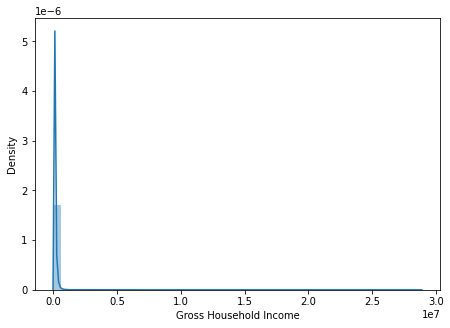

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['Gross Household Income'])
plt.show()

In [21]:
print("Highest allowed",df['Gross Household Income'].mean() + 3*df['Gross Household Income'].std())
print("Lowest allowed",df['Gross Household Income'].mean() - 3*df['Gross Household Income'].std())

Highest allowed 826115.0347038
Lowest allowed -557606.3982275182


In [22]:
df[(df['Gross Household Income'] > 826115.03) | (df['Gross Household Income'] < 0.)]

,Partitioned Date,Customer Code,Employee Index,Country Residence,Sex,Age,Date Joined,New Customer Index,Seniority,Primary Customer,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
467,2015-01-28,1050426,N,ES,H,25,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
822,2015-01-28,1052362,N,ES,V,22,2012-08-17,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1151,2015-01-28,1051383,N,ES,V,53,2012-08-13,0.0,35,1.0,...,0,0,0,1,0,0,0,0.0,0.0,1
1742,2015-01-28,1048801,N,ES,H,23,2012-08-09,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1744,2015-01-28,1048803,N,ES,V,26,2012-08-09,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13644850,2016-05-28,1164027,N,ES,V,27,2013-08-12,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
13645267,2016-05-28,1164544,N,ES,H,22,2013-08-13,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13645403,2016-05-28,1164697,N,ES,V,23,2013-08-13,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13645545,2016-05-28,1167675,N,ES,H,22,2013-08-20,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [23]:
new_df = df[(df['Gross Household Income'] < 250000) & (df['Gross Household Income'] > 0)]

In [24]:
upper_limit = df['Gross Household Income'].mean() + 3*df['Gross Household Income'].std()
lower_limit = df['Gross Household Income'].mean() - 3*df['Gross Household Income'].std()

In [25]:
df['Gross Household Income'] = np.where(df['Gross Household Income']>upper_limit,
    upper_limit, np.where(df['Gross Household Income']<lower_limit,
    lower_limit, df['Gross Household Income']))

In [26]:
df['Gross Household Income'].describe()

count    1.085293e+07
mean     1.297296e+05
std      1.013358e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      8.261150e+05
Name: Gross Household Income, dtype: float64

<AxesSubplot:>

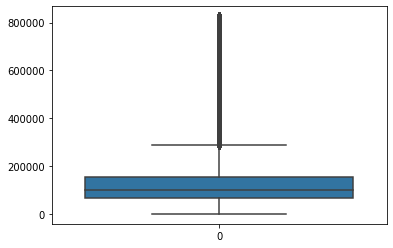

In [27]:
sns.boxplot(df['Gross Household Income'])

<AxesSubplot:>

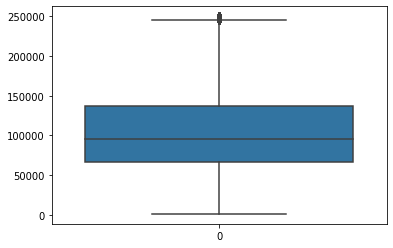

In [28]:
sns.boxplot(new_df['Gross Household Income'])

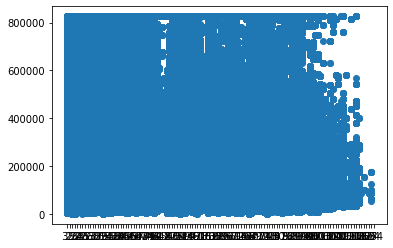

In [29]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Age"],
df["Gross Household Income"])

In [30]:
df['Country Residence'].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [31]:
df['Funds'].mean()

0.018485988702974337

In [32]:
df['Funds'].unique()

array([0, 1], dtype=int64)

In [33]:
df['Pension'].unique()

array([ 0.,  1., nan])

In [34]:
df['Pensions'].unique()

array([0, 1], dtype=int64)

In [35]:
df['Particular Account'].unique()

array([0, 1], dtype=int64)

In [36]:
df['Particular Plus Account'].unique()

array([0, 1], dtype=int64)

In [101]:
print("Sex", df["Sex"].unique())
print("Age", df["Age"].unique())
print("Seniority", df['Seniority'].unique())
print("Primary Customer", df["Primary Customer"].unique())
print('Activity Index', df["Activity Index"].unique())
print('Savings Account', df["Savings Account"].unique())
print('Guarantees', df["Guarantees"].unique())
print('Current Accounts', df["Current Accounts"].unique())
print('Derivative Account', df["Derivative Account"].unique())
print('Payroll Account', df["Payroll Account"].unique())
print('Junior Account', df["Junior Account"].unique())
print('More Partiuclar Account', df["More Partiuclar Account"].unique())
print('Particular Account', df["Particular Account"].unique())
print('Particular Plus Account', df["Particular Plus Account"].unique())
print('Short-Term Deposits', df["Short-Term Deposits"].unique())
print('Medium-Term Deposits', df["Medium-Term Deposits"].unique())
print("Long-Term Deposits", df["Long-Term Deposits"].unique())
print("E-Account", df["E-Account"].unique())
print("Funds", df["Funds"].unique())
print("Mortgage", df["Mortgage"].unique())
print("Pensions", df["Pensions"].unique())
print("Loans", df["Loans"].unique())
print("Taxes", df["Taxes"].unique())
print("Credit Card", df["Credit Card"].unique())
print("Securities", df["Securities"].unique())
print("Home Account", df["Home Account"].unique())
print("Payroll", df["Payroll"].unique())
print("Pension", df["Pension"].unique())
print("Direct Debit", df["Direct Debit"].unique())

Sex [ 1.  0. nan]
Age [ 35  23  22  24  65  28  25  26  53  27  32  37  31  39  63  33  55  42
  58  38  50  30  45  44  36  29  60  57  67  47   0  34  48  46  54  84
  15  12   8   6  83  40  77  69  52  59  43  10   9  49  41  51  78  16
  11  73  62  66  17  68  82  95  96  56  61  79  72  14  19  13  86  64
  20  89  71   7  70  74  21  18  75   4  80  81   5  76  92  93  85  91
  87  90  94  99  98  88  97 100 101 106 103   3   2 102 104 111 107 109
 105 112 115 110 116 108 113 126 117 163 127 114 164]
Seniority [      6      35      34 -999999      33      31      21      16      27
       9      22      13      29       8      11      10      28      24
       7      25      14      26      12      23       1      18       4
       3      17      32      30      20      15      19     157      36
       5      40      38      37      39       0       2      47      44
      42      46      45      43      41      57      48      52      49
      50      56      58      51      

In [38]:
df.count()

Partitioned Date                                13647309
Customer Code                                   13647309
Employee Index                                  13619575
Country Residence                               13619575
Sex                                             13619505
Age                                             13647309
Date Joined                                     13619575
New Customer Index                              13619575
Seniority                                       13647309
Primary Customer                                13619575
Last Date as Primary Customer                      24793
Customer Type at Beginning of Month             13497528
Customer Relation Type at Beginning of Month    13497528
Resident Country is Bank Country                13619575
Birth Country Different Than Bank Country       13619575
Spouse Index                                        1808
Channel Used to Join                            13461183
Deceased                       

In [102]:
print("Sex", df["Sex"].sum())
print("Age", df["Age"].sum())
print("Seniority", df['Seniority'].sum())
print("Primary Customer", df["Primary Customer"].sum())
print('Activity Index', df["Activity Index"].sum())
print('Savings Account', df["Savings Account"].sum())
print('Guarantees', df["Guarantees"].sum())
print('Current Accounts', df["Current Accounts"].sum())
print('Derivative Account', df["Derivative Account"].sum())
print('Payroll Account', df["Payroll Account"].sum())
print('Junior Account', df["Junior Account"].sum())
print('More Partiuclar Account', df["More Partiuclar Account"].sum())
print('Particular Account', df["Particular Account"].sum())
print('Particular Plus Account', df["Particular Plus Account"].sum())
print('Short-Term Deposits', df["Short-Term Deposits"].sum())
print('Medium-Term Deposits', df["Medium-Term Deposits"].sum())
print("Long-Term Deposits", df["Long-Term Deposits"].sum())
print("E-Account", df["E-Account"].sum())
print("Funds", df["Funds"].sum())
print("Mortgage", df["Mortgage"].sum())
print("Pensions", df["Pensions"].sum())
print("Loans", df["Loans"].sum())
print("Taxes", df["Taxes"].sum())
print("Credit Card", df["Credit Card"].sum())
print("Securities", df["Securities"].sum())
print("Home Account", df["Home Account"].sum())
print("Payroll", df["Payroll"].sum())
print("Pension", df["Pension"].sum())
print("Direct Debit", df["Direct Debit"].sum())

Sex 6195253.0
Age 547254475
Seniority -26690822586
Primary Customer 16049289.0
Activity Index 6235185.0
Savings Account 1396
Guarantees 316
Current Accounts 8945588
Derivative Account 5376
Payroll Account 1103620
Junior Account 129297
More Partiuclar Account 132742
Particular Account 1760616
Particular Plus Account 591008
Short-Term Deposits 24275
Medium-Term Deposits 22668
Long-Term Deposits 586381
E-Account 1129227
Funds 252284
Mortgage 80336
Pensions 125159
Loans 35857
Taxes 716980
Credit Card 605786
Securities 349475
Home Account 52511
Payroll 745961.0
Pension 810085.0
Direct Debit 1745712


In [104]:
print("Sex", df["Sex"].mean())
print("Age", df["Age"].mean())
print("Seniority", df['Seniority'].mean())
print("Primary Customer", df["Primary Customer"].mean())
print('Activity Index', df["Activity Index"].mean())
print('Gross Household Income', df['Gross Household Income'].mean())
print('Savings Account', df["Savings Account"].mean())
print('Guarantees', df["Guarantees"].mean())
print('Current Accounts', df["Current Accounts"].mean())
print('Derivative Account', df["Derivative Account"].mean())
print('Payroll Account', df["Payroll Account"].mean())
print('Junior Account', df["Junior Account"].mean())
print('More Partiuclar Account', df["More Partiuclar Account"].mean())
print('Particular Account', df["Particular Account"].mean())
print('Particular Plus Account', df["Particular Plus Account"].mean())
print('Short-Term Deposits', df["Short-Term Deposits"].mean())
print('Medium-Term Deposits', df["Medium-Term Deposits"].mean())
print("Long-Term Deposits", df["Long-Term Deposits"].mean())
print("E-Account", df["E-Account"].mean())
print("Funds", df["Funds"].mean())
print("Mortgage", df["Mortgage"].mean())
print("Pensions", df["Pensions"].mean())
print("Loans", df["Loans"].mean())
print("Taxes", df["Taxes"].mean())
print("Credit Card", df["Credit Card"].mean())
print("Securities", df["Securities"].mean())
print("Home Account", df["Home Account"].mean())
print("Payroll", df["Payroll"].mean())
print("Pension", df["Pension"].mean())
print("Direct Debit", df["Direct Debit"].mean())

Sex 0.4548809226179659
Age 40.09980832118625
Seniority -1955.7571815806325
Primary Customer 1.1783986651565852
Activity Index 0.45781054107782365
Gross Household Income 129729.61926942572
Savings Account 0.00010229122825606132
Guarantees 2.3154747943349124e-05
Current Accounts 0.6554836561552171
Derivative Account 0.0003939238131121674
Payroll Account 0.08086722444695874
Junior Account 0.00947417545832662
More Partiuclar Account 0.00972660617562041
Particular Account 0.12900829020578342
Particular Plus Account 0.043305826811717976
Short-Term Deposits 0.0017787389440658229
Medium-Term Deposits 0.0016609867923412594
Long-Term Deposits 0.042966785613193045
E-Account 0.0827435650500769
Funds 0.018485988702974337
Mortgage 0.005886581742964858
Pensions 0.00917096549949884
Loans 0.002627404420900853
Taxes 0.05253636449500777
Credit Card 0.04438867765066359
Securities 0.025607612460449163
Home Account 0.0038477182571303985
Payroll 0.054724344348271614
Pension 0.05942853646687911
Direct Debit 0

In [106]:
print("Sex", df["Sex"].median())
print("Age", df["Age"].median())
print("Seniority", df['Seniority'].median())
print("Primary Customer", df["Primary Customer"].median())
print('Activity Index', df["Activity Index"].median())
print('Gross Household Income', df['Gross Household Income'].median())
print('Savings Account', df["Savings Account"].median())
print('Guarantees', df["Guarantees"].median())
print('Current Accounts', df["Current Accounts"].median())
print('Derivative Account', df["Derivative Account"].median())
print('Payroll Account', df["Payroll Account"].median())
print('Junior Account', df["Junior Account"].median())
print('More Partiuclar Account', df["More Partiuclar Account"].median())
print('Particular Account', df["Particular Account"].median())
print('Particular Plus Account', df["Particular Plus Account"].median())
print('Short-Term Deposits', df["Short-Term Deposits"].median())
print('Medium-Term Deposits', df["Medium-Term Deposits"].median())
print("Long-Term Deposits", df["Long-Term Deposits"].median())
print("E-Account", df["E-Account"].median())
print("Funds", df["Funds"].median())
print("Mortgage", df["Mortgage"].median())
print("Pensions", df["Pensions"].median())
print("Loans", df["Loans"].median())
print("Taxes", df["Taxes"].median())
print("Credit Card", df["Credit Card"].median())
print("Securities", df["Securities"].median())
print("Home Account", df["Home Account"].median())
print("Payroll", df["Payroll"].median())
print("Pension", df["Pension"].median())
print("Direct Debit", df["Direct Debit"].median())

Sex 0.0
Age 39.0
Seniority 50.0
Primary Customer 1.0
Activity Index 0.0
Gross Household Income 101850.0
Savings Account 0.0
Guarantees 0.0
Current Accounts 1.0
Derivative Account 0.0
Payroll Account 0.0
Junior Account 0.0
More Partiuclar Account 0.0
Particular Account 0.0
Particular Plus Account 0.0
Short-Term Deposits 0.0
Medium-Term Deposits 0.0
Long-Term Deposits 0.0
E-Account 0.0
Funds 0.0
Mortgage 0.0
Pensions 0.0
Loans 0.0
Taxes 0.0
Credit Card 0.0
Securities 0.0
Home Account 0.0
Payroll 0.0
Pension 0.0
Direct Debit 0.0


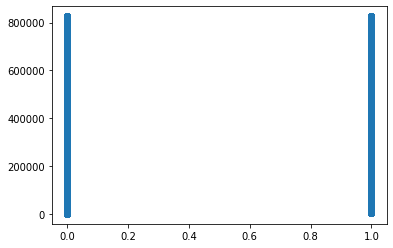

In [107]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Sex"],
df["Gross Household Income"])

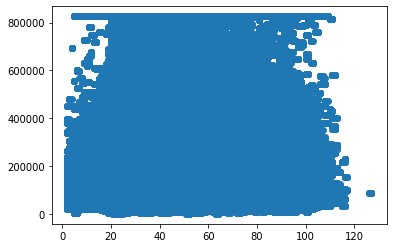

In [108]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Age"],
df["Gross Household Income"])

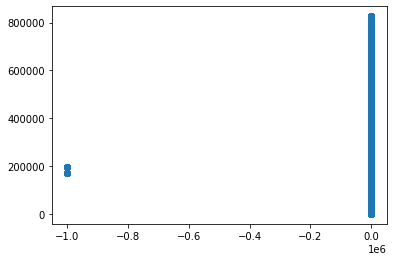

In [109]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Seniority"],
df["Gross Household Income"])

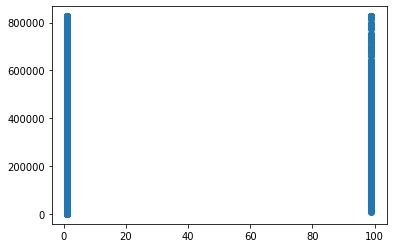

In [42]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Primary Customer"],
df["Gross Household Income"])

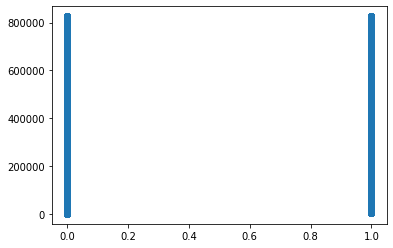

In [44]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Activity Index"],
df["Gross Household Income"])

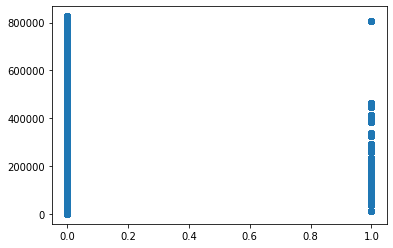

In [45]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Savings Account"],
df["Gross Household Income"])

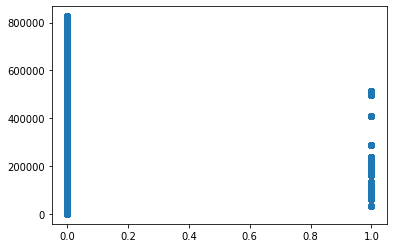

In [46]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Guarantees"],
df["Gross Household Income"])

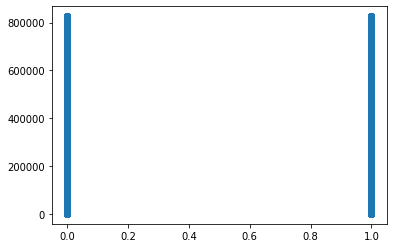

In [47]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Current Accounts"],
df["Gross Household Income"])

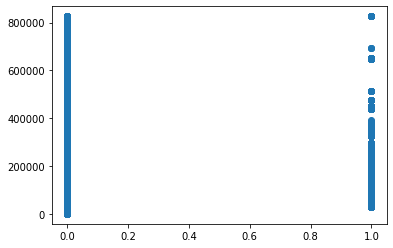

In [48]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Derivative Account"],
df["Gross Household Income"])

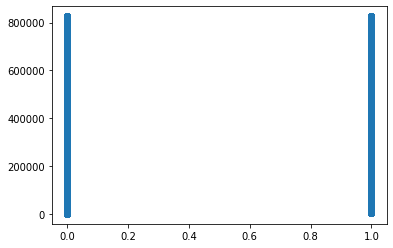

In [49]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Payroll Account"],
df["Gross Household Income"])

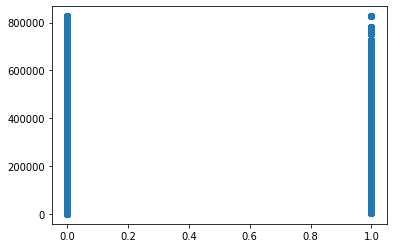

In [50]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Junior Account"],
df["Gross Household Income"])

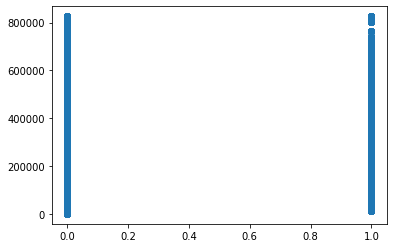

In [51]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["More Partiuclar Account"],
df["Gross Household Income"])

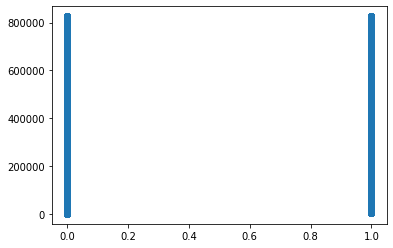

In [52]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Particular Account"],
df["Gross Household Income"])

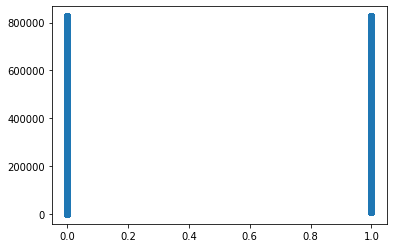

In [53]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Particular Plus Account"],
df["Gross Household Income"])

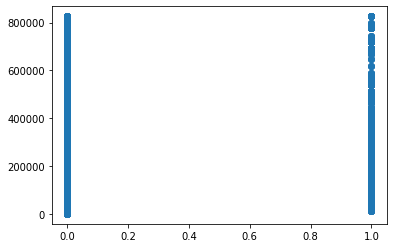

In [54]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Short-Term Deposits"],
df["Gross Household Income"])

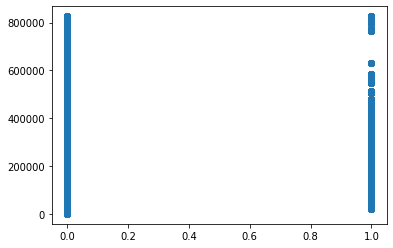

In [55]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Medium-Term Deposits"],
df["Gross Household Income"])

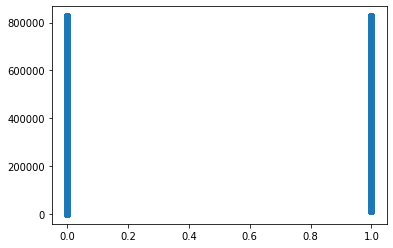

In [56]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Long-Term Deposits"],
df["Gross Household Income"])

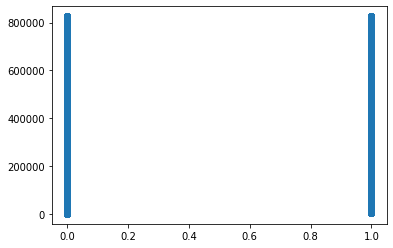

In [57]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["E-Account"],
df["Gross Household Income"])

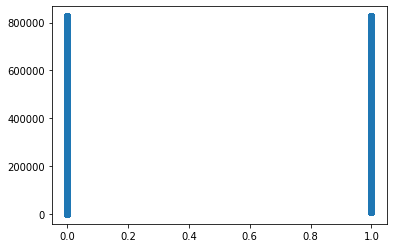

In [58]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Funds"],
df["Gross Household Income"])

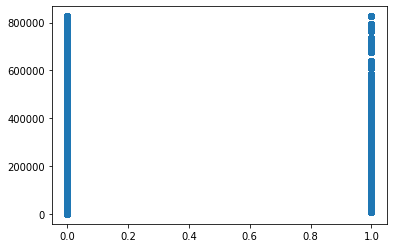

In [59]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Mortgage"],
df["Gross Household Income"])

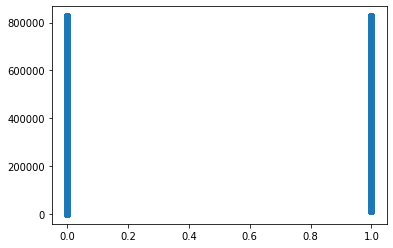

In [60]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Pensions"],
df["Gross Household Income"])

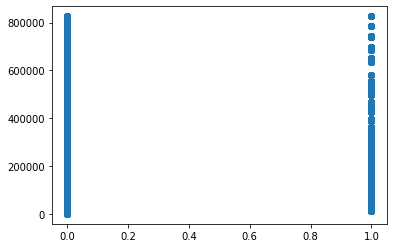

In [61]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Loans"],
df["Gross Household Income"])

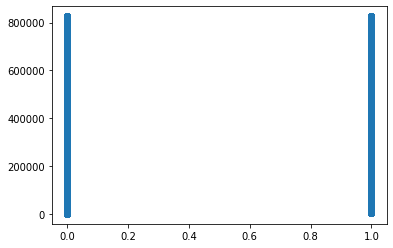

In [62]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Taxes"],
df["Gross Household Income"])

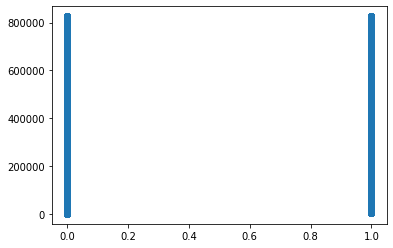

In [63]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Credit Card"],
df["Gross Household Income"])

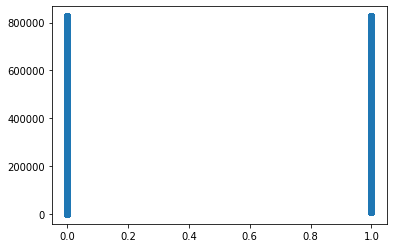

In [64]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Securities"],
df["Gross Household Income"])

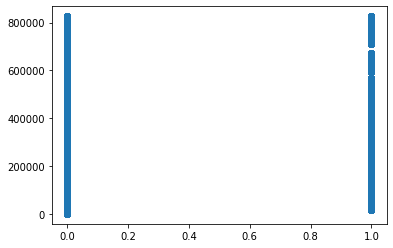

In [65]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Home Account"],
df["Gross Household Income"])

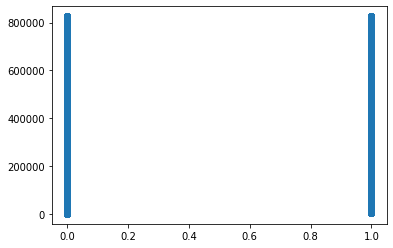

In [66]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Payroll"],
df["Gross Household Income"])

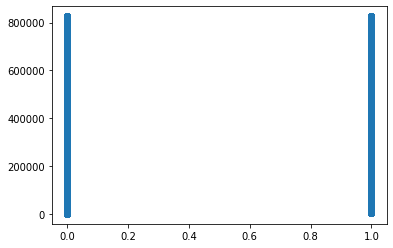

In [67]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Pension"],
df["Gross Household Income"])

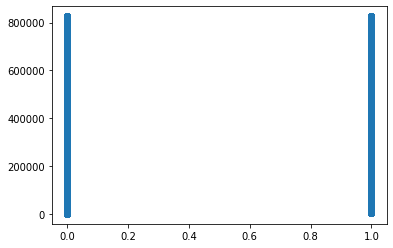

In [68]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Direct Debit"],
df["Gross Household Income"])

In [69]:
df['Age'].unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113', '126', '117',
       '163', '127', '114', '164'], dtype=object)

In [70]:
df['Age'] = df['Age'].replace([' NA'],[' 0'])

In [71]:
df['Age'] = df['Age'].astype(int)

In [72]:
df['Sex'].unique()

array(['H', 'V', nan], dtype=object)

In [73]:
df['Sex'] = df['Sex'].replace(['H'],['1'])

In [74]:
df['Sex'] = df['Sex'].replace(['V'],['0'])

In [75]:
df['Sex'] = df['Sex'].astype(float)

In [76]:
df['Seniority'].unique()

array(['      6', '     35', '     34', '     NA', '     33', '     31',
       '     21', '     16', '     27', '      9', '     22', '     13',
       '     29', '      8', '     11', '     10', '     28', '     24',
       '      7', '     25', '     14', '     26', '     12', '     23',
       '      1', '     18', '      4', '      3', '     17', '     32',
       '     30', '     20', '     15', '     19', '    157', '     36',
       '      5', '     40', '     38', '     37', '     39', '      0',
       '      2', '     47', '     44', '     42', '     46', '     45',
       '     43', '     41', '     57', '     48', '     52', '     49',
       '     50', '     56', '     58', '     51', '     55', '     54',
       '     53', '     59', '     62', '     61', '     60', '     63',
       '    139', '    165', '    118', '    164', '    142', '     94',
       '    159', '    143', '    105', '    151', '    162', '    137',
       '    150', '    128', '    122', '    156', 

In [77]:
df['Seniority'] = df['Seniority'].replace(['     NA'],['-999999'])

In [78]:
df['Seniority'] = df['Seniority'].astype(int)

In [79]:
df['Resident Country is Bank Country'].unique()

array(['S', nan, 'N'], dtype=object)

In [80]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].replace(['N'],['0'])

In [81]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].replace(['S'],['1'])

In [82]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].astype(float)

In [83]:
df['Birth Country Different Than Bank Country'].unique()

array(['N', 'S', nan], dtype=object)

In [84]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].replace(['N'],['0'])

In [85]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].replace(['S'],['1'])

In [86]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].astype(float)

In [87]:
df['Spouse Index'].unique()

array([nan, 'N', 'S'], dtype=object)

In [88]:
df['Spouse Index'] = df['Spouse Index'].replace(['N'],['0'])

In [89]:
df['Spouse Index'] = df['Spouse Index'].replace(['S'],['1'])

In [90]:
df['Spouse Index'] = df['Spouse Index'].astype(float)

In [91]:
df['Deceased'].unique()

array(['N', nan, 'S'], dtype=object)

In [92]:
df['Deceased'] = df['Deceased'].replace(['N'],['0'])

In [93]:
df['Deceased'] = df['Deceased'].replace(['S'],['1'])

In [94]:
df['Deceased'] = df['Deceased'].astype(float)

In [95]:
df.dtypes

Partitioned Date                                 object
Customer Code                                     int64
Employee Index                                   object
Country Residence                                object
Sex                                             float64
Age                                               int32
Date Joined                                      object
New Customer Index                              float64
Seniority                                         int32
Primary Customer                                float64
Last Date as Primary Customer                    object
Customer Type at Beginning of Month              object
Customer Relation Type at Beginning of Month     object
Resident Country is Bank Country                float64
Birth Country Different Than Bank Country       float64
Spouse Index                                    float64
Channel Used to Join                             object
Deceased                                        

In [96]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.corr()

,Customer Code,Sex,Age,New Customer Index,Seniority,Primary Customer,Resident Country is Bank Country,Birth Country Different Than Bank Country,Spouse Index,Deceased,Address Type,Province Code,Activity Index,Gross Household Income,Savings Account,Guarantees,Current Accounts,Derivative Account,Payroll Account,Junior Account,More Partiuclar Account,Particular Account,Particular Plus Account,Short-Term Deposits,Medium-Term Deposits,Long-Term Deposits,E-Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
Customer Code,1.000000,0.135935,-0.604427,0.347430,0.007658,0.028580,0.050913,0.038427,-0.017794,-0.055377,NaN,-0.040821,-0.140516,-0.178484,-0.013037,-0.005278,0.161721,-0.018765,-0.129753,-0.016439,0.023673,-0.446639,-0.155942,0.020474,-0.035326,-0.135388,-0.146260,-0.144393,-0.096869,-0.119479,-0.035985,-0.189476,-0.188148,-0.173800,-0.074148,-0.119276,-0.131112,-0.143262
Sex,0.135935,1.000000,-0.123592,0.024902,-0.003963,-0.000591,0.012855,0.010159,0.113889,-0.014827,NaN,-0.000792,-0.052120,-0.020159,-0.004268,-0.001921,0.036655,-0.012628,-0.027191,0.005916,-0.010492,-0.062419,-0.029367,-0.002071,-0.003285,-0.023505,-0.042111,-0.041566,-0.026636,-0.016253,-0.014515,-0.051078,-0.047341,-0.054630,-0.010212,-0.019858,-0.021056,-0.047290
Age,-0.604427,-0.123592,1.000000,-0.152788,0.105567,-0.000869,-0.029461,-0.016520,-0.082814,0.109344,NaN,0.051155,0.135249,0.143206,0.004951,0.000912,-0.167673,0.013363,0.068959,-0.152388,0.035484,0.317002,0.117488,0.017725,0.028532,0.175474,0.142814,0.115399,0.037736,0.065969,0.019566,0.087455,0.100820,0.110106,0.017366,0.043252,0.071420,0.088640
New Customer Index,0.347430,0.024902,-0.152788,1.000000,-0.011143,0.063021,0.016940,0.016996,-0.026208,-0.012626,NaN,-0.004372,-0.004244,-0.030742,-0.002548,-0.001019,0.002846,-0.004593,-0.046988,-0.011222,0.041261,-0.096910,-0.053555,0.087791,-0.010054,-0.039550,-0.059726,-0.032735,-0.019311,-0.023275,-0.012582,-0.055008,-0.051815,-0.038225,-0.015613,-0.036876,-0.039373,-0.053103
Seniority,0.007658,-0.003963,0.105567,-0.011143,1.000000,-0.001025,-0.002193,-0.000900,0.030794,0.002182,NaN,0.001473,0.005027,0.005526,0.000477,0.000226,0.036575,0.000597,0.009866,0.000278,-0.003627,0.012087,0.007013,-0.015184,0.001694,0.008428,0.006571,0.004875,-0.001263,0.003134,-0.040002,-0.063367,0.008151,0.005861,0.002215,0.004929,0.005156,0.012985
Primary Customer,0.028580,-0.000591,-0.000869,0.063021,-0.001025,1.000000,0.002058,0.004602,-0.005622,0.017776,NaN,-0.000410,-0.033029,-0.000249,-0.000432,-0.000206,-0.046953,-0.000848,-0.011541,-0.002559,-0.000962,-0.014245,-0.008019,0.006660,-0.001152,-0.008047,-0.009846,-0.005303,-0.003150,-0.004021,-0.001879,-0.006023,-0.008518,-0.006373,-0.002656,-0.009256,-0.009652,-0.011989
Resident Country is Bank Country,0.050913,0.012855,-0.029461,0.016940,-0.002193,0.002058,1.000000,-0.246658,NaN,-0.000375,NaN,-0.000254,-0.013759,-0.003600,0.000706,-0.003400,-0.012507,0.000479,0.016264,0.006632,0.003698,-0.020207,0.004040,0.000918,-0.005957,0.001642,0.004881,-0.007927,0.003300,-0.001753,0.002083,0.007568,0.003258,-0.018717,0.003174,0.014824,0.014919,0.011704
Birth Country Different Than Bank Country,0.038427,0.010159,-0.016520,0.016996,-0.000900,0.004602,-0.246658,1.000000,-0.012439,-0.007117,NaN,-0.017906,-0.021085,-0.017033,0.000578,-0.001074,-0.023655,-0.003244,-0.004743,-0.019236,-0.000673,-0.034163,-0.012588,-0.005495,-0.003027,-0.031540,-0.028999,-0.016804,-0.011434,-0.004954,0.031036,0.007773,-0.001367,-0.017942,-0.002788,-0.006887,-0.008559,-0.003418
Spouse Index,-0.017794,0.113889,-0.082814,-0.026208,0.030794,-0.005622,NaN,-0.012439,1.000000,-0.003972,NaN,0.002049,0.041176,-0.054521,NaN,-0.009492,-0.118529,NaN,0.172047,NaN,-0.010304,-0.060070,-0.054257,-0.004588,-0.005622,-0.043020,0.053851,-0.043541,-0.031994,0.143582,-0.025036,-0.054590,-0.074667,0.132255,-0.013488,0.227092,0.212490,0.049243
Deceased,-0.055377,-0.014827,0.109344,-0.012626,0.002182,0.017776,-0.000375,